In [4]:
import pyrealsense2 as rs
import numpy as np
import sys
import matplotlib.pyplot as plt

sys.path.append("../")

from SurfaceContact.control import SurfaceContactControl

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


array([ 9, -5])

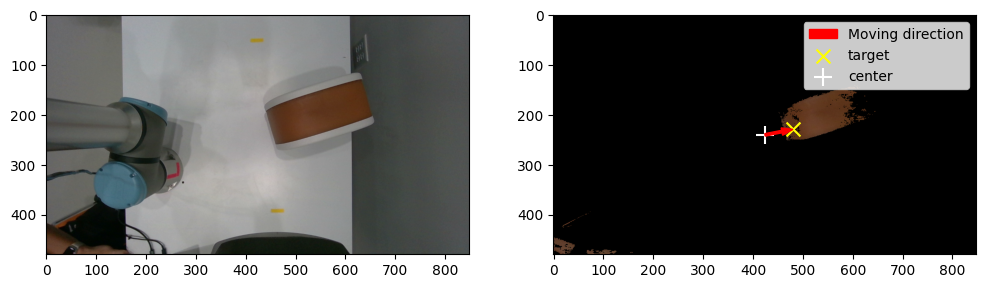

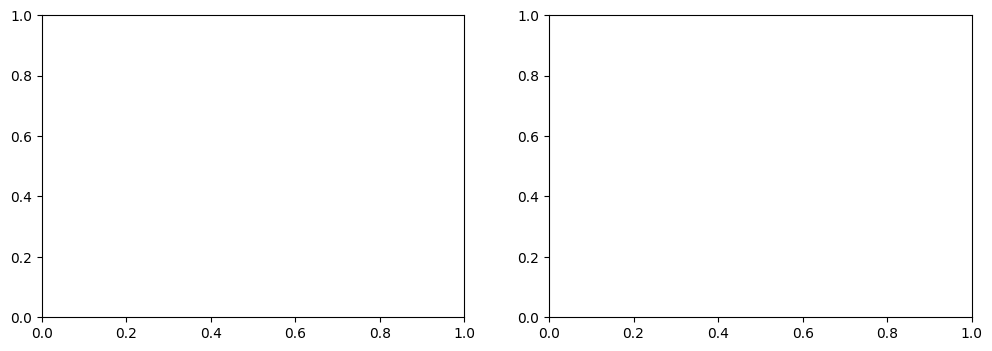

In [13]:
pipeline.stop()